In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定义待优化函数：只能处理行向量形式的单个输入，若有矩阵形式的多个输入应当进行迭代
def CostFunction(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    # 目标函数（不知道）
    result = x1**3 + 2*x2 - x3**x2 * x4
    return result

In [3]:
#代价函数中参数数目和范围
nVar = 4
VarMin = 1
VarMax = 2

In [4]:
#蜂群算法基本参数
iter_max = 1000 #最大迭代次数
nPop = 100 #单次保存的蜜源最大数量
nOnLooker = 100 #跟随峰数量
L = np.around(0.6*nVar*nPop) #蜜源抛弃上界
a = 1 #蜜源搜索范围扩大系数

In [5]:
#创建各记录矩阵
PopPosition = np.zeros([nPop,nVar]) #蜜源位置矩阵
PopCost = np.zeros([nPop,1]) #蜜源代价矩阵
Probability = np.zeros([nPop,1]) #蜜源选择概率矩阵
BestSol = np.zeros([iter_max+1,nVar]) # 历史最优蜜源矩阵
BestCost = np.inf*np.ones([iter_max+1,1]) #历史最优蜜源位置矩阵
Mine = np.zeros([nPop,1]) #蜜源开采量矩阵

In [6]:
#初始化蜜源位置
PopPosition = (VarMax - VarMin) * np.random.rand(nPop,nVar) + VarMin
for i in range(nPop):
    PopCost[i][0] = CostFunction(PopPosition[i])
    if PopCost[i][0] < BestCost[0][0]:
        BestCost[0][0] = PopCost[i][0]
        BestSol[0] = PopPosition[i]

In [7]:
for iter in range(iter_max):

    #雇佣蜂阶段

    #寻找下一个蜜源
    for i in range(nPop):
        phi = a*np.random.rand(4)
        NewPosition = VarMin + phi*(VarMax-VarMin)

        #进行贪婪选择
        NewCost = CostFunction(NewPosition)
        if NewCost < PopCost[i][0]:
            PopPosition[i] = NewPosition
            PopCost[i][0] = NewCost
        else:
            Mine[i][0] = Mine[i][0]+1

    #跟随蜂阶段

    #计算选择概率矩阵
    Mean = np.mean(PopCost)
    for i in range(nPop):
        Probability[i][0] = np.exp(-PopCost[i][0]/Mean)
    Probability = Probability/np.sum(Probability)
    CumProb = np.cumsum(Probability)

    for k in range(nOnLooker):

        #执行轮盘赌选择法
        m = 0
        for i in range(nPop):
            m = m + CumProb[i]
            if m >= np.random.rand(1):
                break

        #重复雇佣蜂操作
        phi = a*np.random.rand(4)
        NewPosition = VarMin + phi*(VarMax-VarMin)

        #进行贪婪选择
        NewCost = CostFunction(NewPosition)
        if NewCost < PopCost[i][0]:
            PopPosition[i] = NewPosition
            PopCost[i][0] = NewCost
        else:
            Mine[i][0] = Mine[i][0]+1

    #侦查蜂阶段
    for i in range(nPop):
        if Mine[i][0] >= L:
            PopPosition[i] = (VarMax - VarMin) * np.random.rand(1,nVar) + VarMin
            PopCost[i][0] = CostFunction(PopPosition[i])
            Mine[i][0] = 0

    #保存历史最优解
    for i in range(nPop):
        if PopCost[i][0] < BestCost[iter+1][0]:
            BestCost[iter+1][0] = PopCost[i][0]
            BestSol[iter+1] = PopPosition[i]

d:\python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
d:\python\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
d:\python\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


[1.113009   1.9853315  1.9958567  1.96157299]
0 [-0.09630758]
1 [-0.32741058]
2 [-0.57333918]
3 [-0.57333918]
4 [-0.66937978]
5 [-1.46032802]
6 [-1.46032802]
7 [-1.51467422]
8 [-1.51467422]
9 [-1.51467422]
10 [-1.51467422]
11 [-1.51467422]
12 [-1.51467422]
13 [-1.51467422]
14 [-1.51467422]
15 [-1.55019965]
16 [-1.55019965]
17 [-1.55019965]
18 [-1.60665444]
19 [-1.60665444]
20 [-1.55019965]
21 [-1.55019965]
22 [-1.55019965]
23 [-1.34507973]
24 [-1.91614574]
25 [-1.91614574]
26 [-1.91614574]
27 [-1.34507973]
28 [-1.34507973]
29 [-2.02560328]
30 [-2.02560328]
31 [-2.02560328]
32 [-2.02560328]
33 [-2.02560328]
34 [-2.02560328]
35 [-2.02560328]
36 [-2.02560328]
37 [-2.02560328]
38 [-2.02560328]
39 [-2.02560328]
40 [-2.02560328]
41 [-2.02560328]
42 [-2.02560328]
43 [-2.02560328]
44 [-2.02560328]
45 [-2.02560328]
46 [-2.02560328]
47 [-2.02560328]
48 [-2.02560328]
49 [-2.09597761]
50 [-2.09597761]
51 [-2.09597761]
52 [-2.09597761]
53 [-2.09597761]
54 [-2.09597761]
55 [-2.09597761]
56 [-2.09597

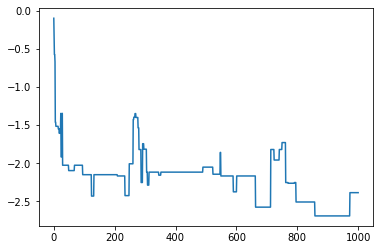

In [8]:
#输出结果
y = np.zeros(iter_max+1)
print(BestSol[iter_max-1])
for i in range(iter_max+1):
    print(i,BestCost[i])
    y[i] = BestCost[i][0]
print(min(y),BestSol[np.argmin(y)+1])
x = [i for i in range(iter_max+1)]
plt.plot(x,y)
plt.show()